In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('D:\\Projects\\Python Practice For Begineer to Pro\\yelp-reviews-dataset\\yelp.csv')

In [3]:
dataset.sample(5)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
4681,LnNQdWEbcYIbC6rjdFBpqw,2008-03-30,KWB9EDNG24BEJqeweMPWQQ,4,What a nice surprise! My car was actually wash...,review,UsULgP4bKA8RMzs8dQzcsA,2,2,2
6796,XbVqzUHS3c9FhG4lI13c3Q,2011-07-18,hfNyHHbO9yuwJ3paaj-TtQ,4,"I just went here for lunch and mmm, mmm, mmm, ...",review,EJkV29QY_oHwSngQiTj2rQ,1,1,0
8969,Oz1w_3Ck8lalmtxPcQMOIA,2008-04-09,OIp5gapOlB6B9EBCMgUf_A,4,We've got another first timer here...!\n\nI am...,review,-Dof9NwAoQwRM-GVPZk5zw,4,4,5
7747,M6fjHpkL9IRI-nI0BattRw,2012-10-15,xu7ZZRs27-Ke7zMb49ZrwQ,5,Hip hop sandwich shop. Not a traditional dini...,review,5bs9-7Fwjuv4HiQNFVZTEw,0,0,1
3535,3jqOv6re-xPYOg7srmi7tg,2011-03-28,osl1TFnmplk4bxFS8AdVOw,3,Picazzos is not very big and was filling up fa...,review,Wn47EMhtvJQZTsfvvcnkJg,1,1,1


In [4]:
dataset.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


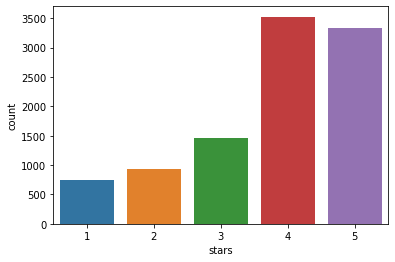

In [6]:
sns.countplot(x = 'stars',data=dataset)

In [7]:
dataset['length'] = dataset['text'].apply(lambda x:len(x)) 

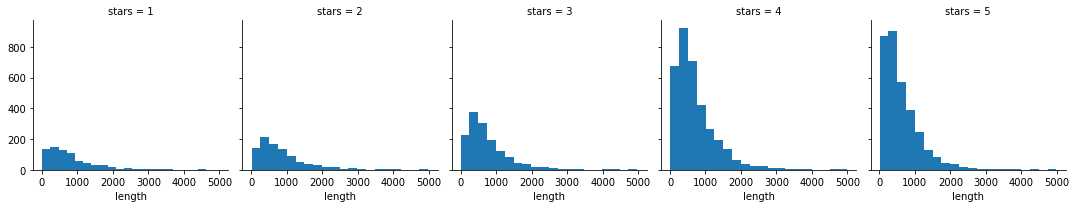

In [8]:
g = sns.FacetGrid(data=dataset,col='stars',col_wrap=5)
g.map(plt.hist,'length',bins=20)

In [9]:
yelp_df_1 = dataset[dataset['stars']==1]
yelp_df_5 = dataset[dataset['stars']==5]

In [10]:
print('1 star review:',yelp_df_1.shape,'\n2 start review:',yelp_df_5.shape)

1 star review: (749, 11) 
2 start review: (3337, 11)


In [11]:
yelp_df_1_5 = pd.concat([yelp_df_1,yelp_df_5])

In [12]:
print('Percentage of yelp: {}'.format(len(yelp_df_1)/len(yelp_df_1_5)))
print('Percentage of yelp: {}'.format(len(yelp_df_5)/len(yelp_df_1_5)))

Percentage of yelp: 0.18330885952031326
Percentage of yelp: 0.8166911404796867


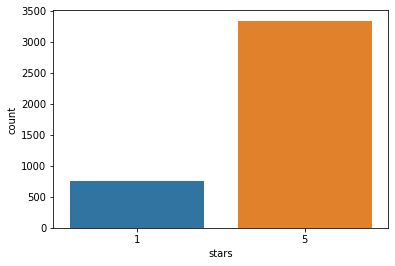

In [13]:
sns.countplot(yelp_df_1_5['stars'])

In [14]:
import string
from nltk.corpus import stopwords
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
def test_cleaner(text):
    punc_remove_text = [i for i in text if i not in string.punctuation]
    punc_remove_text = ''.join(punc_remove_text)
    stop_remove_text = [i for i in punc_remove_text.split() if i not in stopwords.words('english')]
    return stop_remove_text

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(analyzer=test_cleaner)
yelp_count_vect = count_vect.fit_transform(yelp_df_1_5['text'])

In [17]:
label = yelp_df_1_5['stars']

In [18]:
from sklearn.naive_bayes import MultinomialNB
multinb = MultinomialNB()
multinb.fit(yelp_count_vect,label)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(yelp_count_vect,label,test_size=0.2)

In [21]:
from sklearn.metrics import classification_report,confusion_matrix
multinb.fit(x_train,y_train)
y_pred = multinb.predict(x_test)
print(classification_report(y_pred=y_pred,y_true=y_test))

              precision    recall  f1-score   support

           1       0.84      0.67      0.75       159
           5       0.92      0.97      0.95       659

    accuracy                           0.91       818
   macro avg       0.88      0.82      0.85       818
weighted avg       0.91      0.91      0.91       818



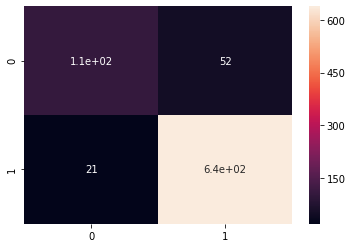

In [22]:
cm = confusion_matrix(y_pred=y_pred,y_true=y_test)
sns.heatmap(cm,annot=True)

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_vect = TfidfTransformer().fit_transform(yelp_count_vect)
tfidf_vect.shape

(4086, 26639)

In [24]:
X = tfidf_vect
y = yelp_df_1_5['stars']

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [26]:
from sklearn.naive_bayes import MultinomialNB
multinb = MultinomialNB()
multinb.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [27]:
from sklearn.metrics import classification_report,confusion_matrix
multinb.fit(x_train,y_train)
y_pred = multinb.predict(x_test)
print(classification_report(y_pred=y_pred,y_true=y_test))

              precision    recall  f1-score   support

           1       1.00      0.01      0.01       142
           5       0.83      1.00      0.91       676

    accuracy                           0.83       818
   macro avg       0.91      0.50      0.46       818
weighted avg       0.86      0.83      0.75       818



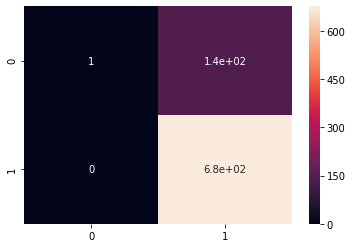

In [28]:
cm = confusion_matrix(y_pred=y_pred,y_true=y_test)
sns.heatmap(cm,annot=True)